### Домашнее задание по sklearn

В следующей ячейке мы импортируем библиотеки и фиксируем случайность. Значение сида(seed), а в нашем случае, 42, фиксирует случайность. Что это значит? 

После написания такой строчки, операции из ```numpy```, например, генерация датасета, будут все еще случайными,
но для всех запускающих этот код -- одинаковыми.

Пожалуйста, обращайте на него внимание во всех заданиях. Это требуется для проверки ваших решений и его удаление или изменение может повлечь за собой ошибки.

In [1]:
import sklearn
import numpy as np

np.random.seed(42)

# Задание 1

1. Получите выборку с помощью следующего вызова:
```
sklearn.datasets.make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Отправьте значение доли верных ответов(`accuracy`), которое получается, если применить обученный `GridSearchCV` к тестовой выбоке.

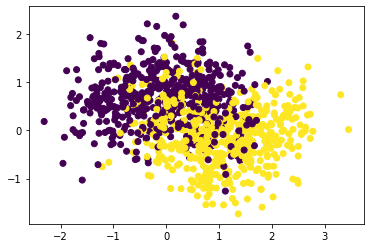

In [2]:
# your code here
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

data = make_moons(n_samples=1000, noise=0.5, random_state=10)

data[0][:, 0]

plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1])
# your code here


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], random_state=10, test_size=0.5)

In [4]:
knn_clf = GridSearchCV(KNeighborsClassifier(),
                      param_grid={
                          'n_neighbors': np.arange(1, 21)}, 
                      cv=KFold(n_splits=5, random_state=10))
knn_clf.fit(X_train, y_train)
preds = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)
accuracy

0.8

In [5]:
# проверка, просто запустите ячейку


# Задание 2

Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от 1 до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра. В данном задании использовать KFold не требуется.

Код ниже строит изображение зависимости качества от количества соседей.

In [20]:
def train_grid_search(X, y):
    knn_clf = GridSearchCV(KNeighborsClassifier(),
                      param_grid={
                          'n_neighbors': np.arange(1, 21)})
    knn_clf.fit(X, y)
    return knn_clf.cv_results_['mean_test_score']

Text(0.5, 0, 'Neighbors Count')

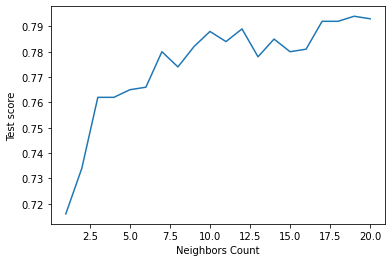

In [21]:
import numpy as np

# аккуратно, не меняйте random_state
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
test_score = train_grid_search(X, y)

# небольшая проверка: если не выдалась ошибка, то можете продолжать
assert (type(test_score) == np.ndarray), 'Переменная test_score должна иметь тип np.array()'
assert (len(test_score) == 20), 'Переменная test_score должна иметь 20 значений (по 1 для каждого кол-ва соседей)'

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 21), test_score)
plt.ylabel('Test score')
plt.xlabel('Neighbors Count')

# проверяться будет переменная ```test_score```

In [8]:
# проверка номер 1, просто запустите ячейку

# your code here


In [9]:
# проверка номер 2, запускайте


## Задание 3

Загрузим данные:

In [10]:
!pip install python-mnist

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [11]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('', gz=True)
images, labels = mndata.load_training()

# Далее мы берем только 5000 картинок и меток, чтобы не ждать обучения слишком долго:
images, labels = np.array(images)[:5000, :], np.array(labels)[:5000]

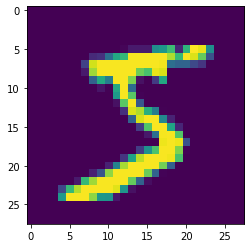

In [12]:
# Так вы можете посмотреть на данные. Например, это картинка номер 0. Можете посмотреть на любую другую!
plt.imshow(images[0].reshape(28, 28))
plt.show()

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузил данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20 и ```random_state=10```. Какой `accuracy` вы получаете на тестовой выборке?

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=30)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

knn_clf.fit(X_train, y_train)

preds = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

accuracy
# your code here


0.897

In [14]:
# проверка, просто запустите ячейку


# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

knn_clf.fit(X_train, y_train)

preds = knn_clf.predict(X_test)

_, indeces = knn_clf.kneighbors(X_test)

indeces[4]


array([ 667, 2228, 2926, 2835, 2311])

In [16]:
wrong_answs = {i: values for (i, values) in zip(np.arange(len(preds)), (np.stack((preds, y_test), axis=1))) if values[0] != values[1]}

In [17]:
!pip install more-itertools

from more_itertools import take

n_items = np.array(take(1, wrong_answs.items()))

     |████████████████████████████████| 48 kB 13.7 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [18]:
n_items

array([[4, array([1, 8], dtype=uint8)]], dtype=object)

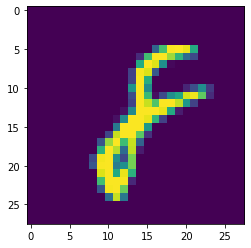

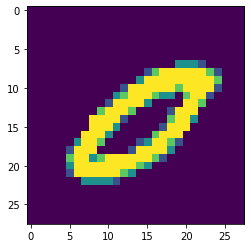

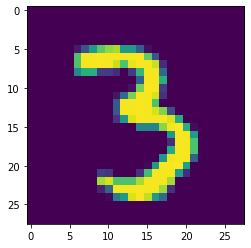

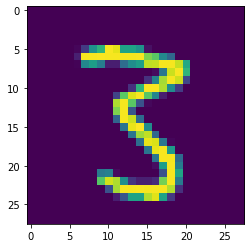

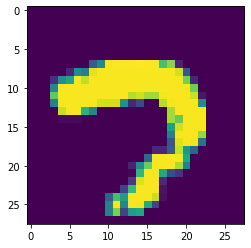

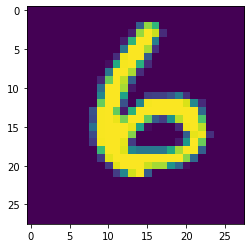

In [19]:
plt.imshow(X_test[4].reshape(28, 28))
plt.show()

for i in indeces[4]:
    plt.imshow(images[i].reshape(28, 28))
    plt.show()